In [13]:
from client_side.client import client
from server_side.workers import phone_support
from server_side.vm import vm_deliver
from server_side.server import server
from settings.statistic import statistic_collector
from simpy import Environment
import matplotlib.pyplot as plt
import pandas
import numpy as np

# statistic_collector.unload()
time = 500
skip = 0
env = Environment()
client(env, phone_support(env), vm_deliver(env, server(env, "server")))
env.run(until=time)
statistic_collector.save()

In [14]:
for key in statistic_collector.load:
    print(f"{key}: {statistic_collector.load[key]}")

clien_count: 1083
client_vms_1: [0, 1, 1, 2, 3, 3, 4, 5, 6, 7, 8, 8, 8, 9, 10, 10, 0, 1, 2, 0, 1, 2, 3, 4, 5, 6, 6, 7, 8, 9, 10, 11, 11, 11, 11, 12, 13, 14, 14, 15, 15, 16, 16, 16, 16, 16, 17, 18, 18, 18, 18, 18, 19, 20, 20, 21, 21, 22, 23, 23, 24, 25, 26, 27, 27, 28, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 0, 1, 2, 3, 4, 5, 6, 7, 8, 8, 8, 8, 9, 10, 11, 12, 13, 14, 14, 15, 16, 16, 17, 18, 19, 20, 20, 21, 22, 22, 23, 24, 24, 25, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 27, 28, 29, 29, 29, 29, 29, 29, 29, 29, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 31, 31, 31, 32, 32, 32, 32, 32, 32, 33, 33, 33, 33, 33, 33, 33, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 0, 1, 2, 3, 3, 4, 4, 5, 6, 7, 8,

In [15]:
df = pandas.DataFrame()
import warnings
warnings.filterwarnings("ignore")
for key in statistic_collector.load:
    if key[:10] == "client_vms":
        if len(statistic_collector.load[key]) == 1 and statistic_collector.load[key][0] == 0:
            continue
        # plt.plot(statistic_collector.load[key])
        x = [np.NaN] * (time // 2 - len(statistic_collector.load[key])) + statistic_collector.load[key]
        df[key] = np.array(x)
        
df['mean'] = df.mean(axis=1)        
df["sum"] = df.sum(axis=1)
df1 = df.iloc[skip:]
df.head()


ValueError: Length of values (250) does not match length of index (988)

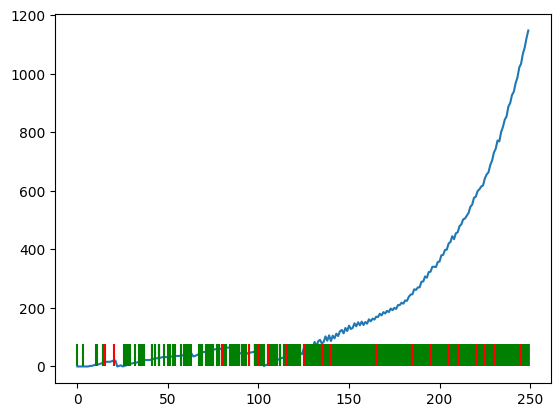

In [ ]:
plt.plot(df['sum'])
plt.vlines([x // 2 for x in statistic_collector.load["break_time_vm"]], 0, df['sum'].max() // 15, 'g')
plt.vlines([x // 2 for x in statistic_collector.load["break_time_hadoop_claster"]], 0, df['sum'].max() // 15, 'r')
plt.vlines([x // 2 for x in statistic_collector.load["break_time_proxmox_claster"]], 0, df['sum'].max() // 15, 'r')

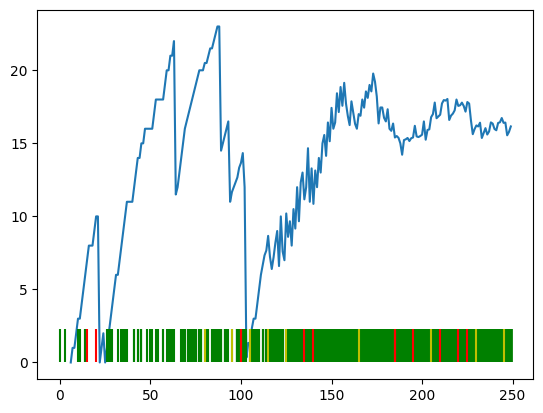

In [ ]:
plt.plot(df['mean'])
plt.vlines([x // 2 - skip for x in statistic_collector.load["break_time_vm"]], 0, df['mean'].max() / 10, 'g')
plt.vlines([x // 2 - skip for x in statistic_collector.load["break_time_hadoop_claster"]], 0, df['mean'].max() / 10, 'y')
plt.vlines([x // 2 - skip for x in statistic_collector.load["break_time_proxmox_claster"]], 0, df['mean'].max() / 10, 'r')

In [ ]:
df['mean'].mean()

KeyError: 'mean'